# Исследование надежности заемщиков


**Цель исследования**:  
- Изучим представленные данные по заемщикам и оценить их надежность в зависимости от различных факторов: наличия детей, семейного положения, цели кредита, получаемого дохода, опыта работы и так далее. 
- Для повышения качества исследования предварительно проанализируем данные на полноту и качество, устраним недостоверные данные и дополним их, если данные неполные. Сделаем выводы о возможных причинах плохого качества входных данных. Если будем использовались методы дополнения данных, то обоснуем их.
- Сформулируем общие закономмерности, влияющие на степень надежности заемщиков.

## Откроем таблицу и изучим общую информацию о данных

**Задание 1. Импортируем необхдимые библиотеки. Загрузим данные из csv-файла в датафрейм и сохраним в переменную `data`.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

try:
    data = pd.read_csv('...')
except:
    data = pd.read_csv('...')

**Задание 2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` заполним медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category`  появится строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуем данные и ответим на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

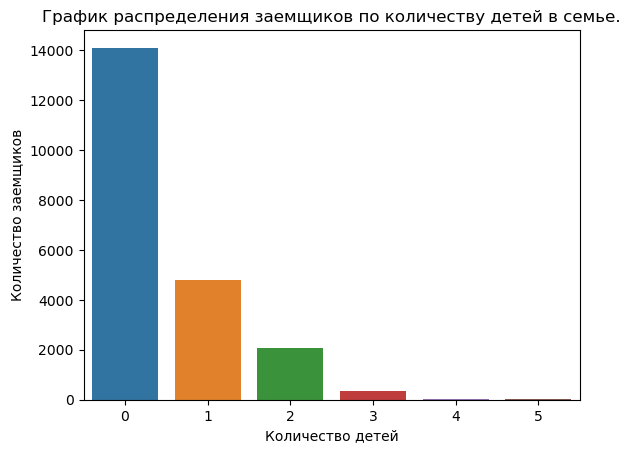

In [22]:
#удаляем кривые данные
#data = data.loc[(data['children']!=-1)&(data['children']!=20)] 
#группируем заемщиков по кол-ву детей
child_groups = data.groupby(by='children').agg({'debt':['sum','count']}) 

#рассчитываем процент должников среди общего количества заемщиков
child_groups['debt_pct'] = child_groups['debt']['sum'] / child_groups['debt']['count'] *100 

data_temp = data.pivot_table(index='children', values='debt', aggfunc=['count', 'sum', 'mean'])
data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
# Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
#display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
#print(data_groups.sort_values(by='debt_pct',ascending=False))

#строим график по количеству заемщиков
child_cnt_barplot = sns.barplot(data=child_groups,x=child_groups.index, y=child_groups['debt']['count']) 
child_cnt_barplot.set(xlabel='Количество детей',
 ylabel='Количество заемщиков',
 title='График распределения заемщиков по количеству детей в семье.');

Перед основными выводами стоит заметить, что есть обратная зависимость между кол-вом детей и кол-вом заемщиков в данной категории. С одной стороны, это объсняется общей редкостью большого количества детей в семьях. С другой стороны, стоит учитывать разную степень репрезентативности групп. Репрезентативность выборки по группе без детей (14тыс.заемщиков) гораздо выше, чем репрезентативность выборки по группе с 5 детьми (9 человек). 

In [23]:
# Создаем копию датасета, что бы не работать с исходным
temp = data.copy()
# Напишем функцию, так как все задачи аналогичны
def que(category):
    data_temp = temp.pivot_table(index=category, values='debt', aggfunc=['count', 'sum', 'mean'])
    data_temp.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    # Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
    display(data_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))
    
que('children')

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091.000,1063.000,0.075
1,4808.000,444.000,0.092
2,2052.000,194.000,0.095
3,330.000,27.000,0.082
4,41.000,4.000,0.098
5,9.000,0.000,0.000


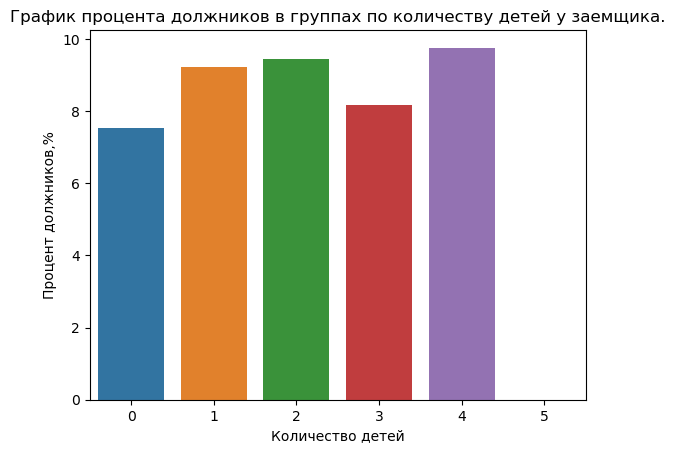

In [24]:
#строим график по проценту должников

child_barplot = sns.barplot(data=child_groups,x=child_groups.index, y=child_groups['debt_pct']) 
child_barplot.set (xlabel='Количество детей',
 ylabel='Процент должников,%',
 title='График процента должников в группах по количеству детей у заемщика.');

**Вывод:** 
В целом, если рассматривать людей с 0,1,2 детьми, то можно заметить, что чем больше детей у заемщика, тем более он склонен к задолженности. Вероятно, с ростом количества детей, растет и финансовая нагрузка на заемщика, в связи с чем и возможны долги.
Однако, для заемщиков с 3мя детьми ситуация отличается: по проценту задолженности они находятся между категорией "без детей" и категорией с 1 ребенком. Аналогично, для группы с 5 детьми (9заемщиков) - процент задолженности по группе нулевой, хотя в реальности маловероятно, что семьи с 5 детьми никогда не задерживают выплат.
Поэтому я бы сделала следующие выводы:
- для групп с 0-2 детьми есть прямая зависмость между кол-вом детей и риском задолженности. 
- на группы с 3 и более детьми стоит смотреть отдельно, т.к. группы небольшие и репрезентативность под вопросом. Но если верить представленным данным, то в этих категориях зависимости между количеством детей и риском задолженности нет.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

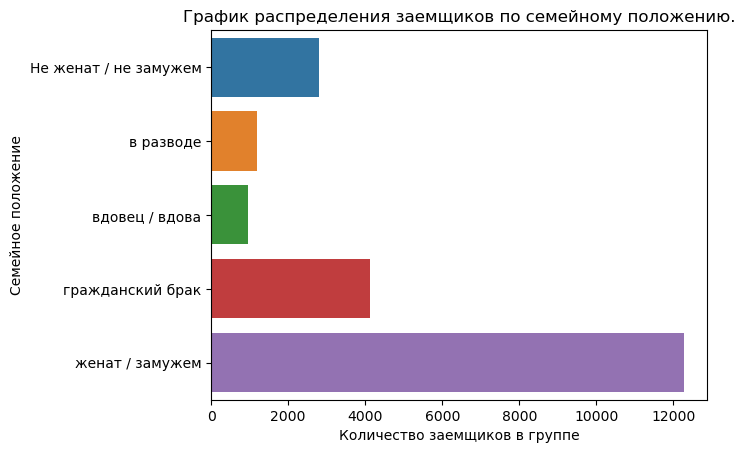

In [25]:
#группируем заемщиков по кол-ву детей
family_groups = data.groupby(by='family_status').agg({'debt':['sum','count']}) 
#рассчитываем процент должников среди общего количества заемщиков
family_groups['debt_pct'] =  family_groups['debt']['sum'] / family_groups['debt']['count'] *100 
#строим график по количеству заемщиков - смотрим на группы в целом
family_barplot = sns.barplot(data=family_groups,x=family_groups['debt']['count'], y= family_groups.index )
family_barplot.set (xlabel='Количество заемщиков в группе',
 ylabel='Семейное положение',
 title='График распределения заемщиков по семейному положению.');

Можно заметить, что наибольшую долю среди заемщиков составляют женатые, либо замужние люди. 
Посмотрим далее, каков процент должников в каждой из категорий.

,Всего кредитополучателей,Всего должников,Доля должников
family_status,,,
Не женат / не замужем,2796.000,273.000,0.098
в разводе,1189.000,84.000,0.071
вдовец / вдова,951.000,63.000,0.066
гражданский брак,4134.000,385.000,0.093
женат / замужем,12261.000,927.000,0.076


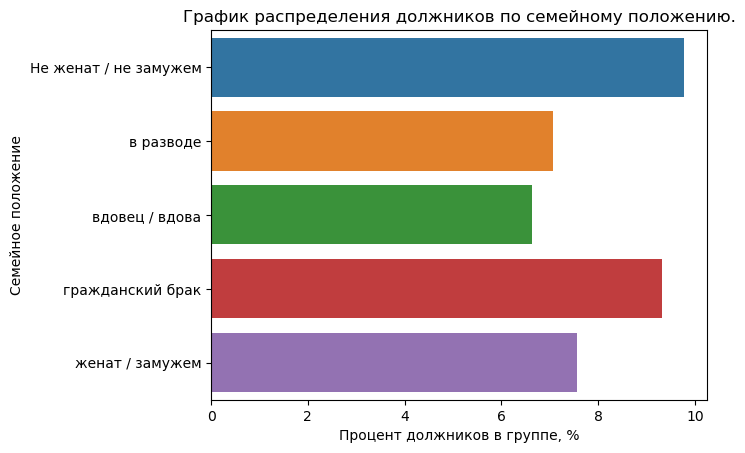

In [26]:
#print(data_groups.sort_values(by='debt_pct',ascending=False))
que('family_status')

#строим график по проценту должников
family_barplot2 = sns.barplot(data=family_groups,x=family_groups['debt_pct'], y=family_groups.index)
family_barplot2.set (xlabel='Процент должников в группе, %',
 ylabel='Семейное положение',
 title='График распределения должников по семейному положению.');

**Вывод:** По приведенным данным можно сделать вывод, что замужние люди (либо побывавшие в официальном браке - вдовцы и в разводе), менее склонны к задолженности, чем те люди, которые "не женаты\не замужем", либо находятся в гражданском браке. 
Хотя, стоит иметь ввиду, что логически категории могут пересекаться между собой - например, категории "в разводе" и "не женат/не замужем". Поэтому вывод, что побывавшие в официальнм браке платят ответственнее, может быть не совсем достоверным. Так как в группу "не женат/не замужем" могут попадать и люди,которые решили не указывать факт прошлого брака в заявке. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Оценим общее воличество должников по категориям дохода:

In [27]:
que('total_income_category')

,Всего кредитополучателей,Всего должников,Доля должников
total_income_category,,,
A,25.000,2.000,0.080
B,5014.000,354.000,0.071
C,15921.000,1353.000,0.085
D,349.000,21.000,0.060
E,22.000,2.000,0.091


По столбцу "доля должников" видим, что данные распределены волнообразно: с повышением уровня дохода сначала доля должников повышается, затем снижается, потом опять повышается и снова снижается. Посмотрим более наглядно на графике:

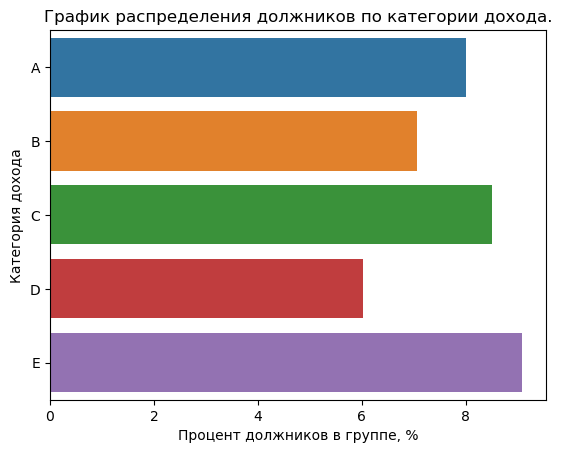

In [28]:
temp_income = data.copy()

#группируем заемщиков по категориям дохода
income_groups = temp_income.groupby(by='total_income_category').agg({'debt':['sum','count']}) 
#рассчитываем процент должников среди общего количества заемщиков
income_groups['debt_pct'] = income_groups['debt']['sum'] / income_groups['debt']['count'] *100 

income_barplot = sns.barplot(data=income_groups,x=income_groups['debt_pct'], y=income_groups.index)
income_barplot.set (xlabel='Процент должников в группе, %',
 ylabel='Категория дохода',
 title='График распределения должников по категории дохода.');

**Вывод:** по полученному графику видно, что между уровнем дохода и процентом должников есть зависмости. 
- пик процента должников приходится на уровни дохода до 30тыс.(категория Е). Очевидно, что минимальный уровень дохода ведет к высоким рискам задолженности по кредиту. 
- люди с доходом от 30 до 50тыс. являются наиболее дисциплинированны в выплатах - они уже обеспечены необходимым им доходом, но все еще аккуратно относятся к расходам и ведению бюджета, поэтому у них минимальный процент должников по группе. 
- далее с повышением дохода график в целом является волнообразным - и,похоже, это не случайно. Вероятно, при переходе на новый уровень дохода люди с одной стороны, имеют больше средств к выплатам (и поначалу снижают процент задолженности), но,с другой стороны, в какой-то момент люди начинают брать кредиты на бОльшие суммы (к сожалению, данных о сумме кредитов у нас нет, поэтому подтвердить гипотезу не можем), что ведет к новым задолженностям. Таким образом, происходит борьба двух факторов: повышение доходов и повышение потребительских аппетитов заемщиков. Поэтому, я бы сделала вывод, что зависимость есть, но она волнообразная. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,Всего кредитополучателей,Всего должников,Доля должников
purpose_category,,,
операции с автомобилем,4279.000,400.000,0.093
операции с недвижимостью,10751.000,780.000,0.073
получение образования,3988.000,369.000,0.093
проведение свадьбы,2313.000,183.000,0.079


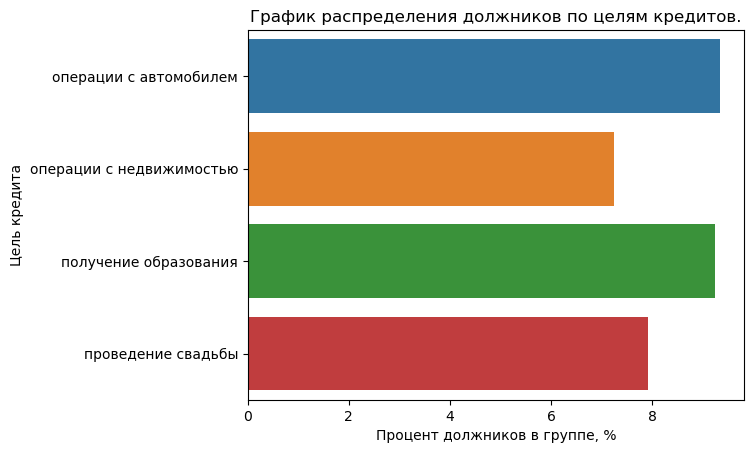

In [29]:
#изучаем табличные данные по категориям
que('purpose_category')

#группируем заемщиков по категориям
purpose_groups = data.groupby(by='purpose_category').agg({'debt':['sum','count']}) 
#рассчитываем процент должников среди общего количества заемщиков
purpose_groups['debt_pct'] = purpose_groups['debt']['sum'] / purpose_groups['debt']['count'] *100 

#строим график
purpose_barplot = sns.barplot(data=purpose_groups,x=purpose_groups['debt_pct'], y= purpose_groups.index)

purpose_barplot.set (xlabel='Процент должников в группе, %',
 ylabel='Цель кредита',
 title='График распределения должников по целям кредитов.');

**Вывод:** 
- Заемщики, берущие кредит на операции с недвижимостью или проведение свадьбы менее склонны к просрочке, чем заемщики, берущие кредит на оперции с автомобилем и получение образования.
- процент должников в категориях "операции с недвижимостью" и "получение образования" практически идентичен
- наименьший процент должников в категории "операции с недвижимостью"

#### 3.5 Приведем возможные причины появления пропусков в исходных данных.

Количество пропусков в столбцах "days_employed" и "total_income" совпадает, при этом мы знаем, что в таблице есть заемщики с категорией "безработные" и "пенсионеры". Проверим гипотезу, что все пропуски объясняются тем, что данные заемщики не указывают количество отработанных дней или не имеют официального дохода.

In [30]:
try:
    data_for_empties = pd.read_csv('...')
except:
    data_for_empties = pd.read_csv('...')

data_for_empties['purpose_category'] = data_for_empties['purpose'].apply(categorize_purpose)

data_for_empties['empty_income'] = 0
data_for_empties['empty_days'] = 0
data_for_empties.loc[(data_for_empties['total_income'].isna()), 'empty_income'] = 1
data_for_empties.loc[(data_for_empties['days_employed'].isna()), 'empty_days'] = 1

data_for_empties.groupby(by=['income_type'])[['empty_income','empty_days']].agg({'empty_income':['sum','count'],'empty_days':['sum','count']})
#data_for_empties.columns = ['Income_total: пустых значений', 'Income_total: всего значений','Days_employed: пустых значений', 'Days_employed: всего значений' ]

empty_income        empty_days       
                         sum  count        sum  count
income_type                                          
безработный                0      2          0      2
в декрете                  0      1          0      1
госслужащий              147   1459        147   1459
компаньон                508   5085        508   5085
пенсионер                413   3856        413   3856
предприниматель            1      2          1      2
сотрудник               1105  11119       1105  11119
студент                    0      1          0      1

Хотя в данных с проусками действительно есть пенсионеры, но больше половины всех пропусков - это сотрудники, а также есть госслужащие, компаньоны и предприниматели. 
При этом нельзя сказать, что данные заполнены только для одной из категорий.
Следовательно, пропуски в "days_employed" и "total_income" не зависят от рода деятельности заемщика (хотя, это было бы логично).
При этом заметно, что доля пропусков по каждой группе составляет примерно 10% от общего количества записей по группе.
Посмотрим данные в остальных разрезах.

In [31]:
data_for_empties.groupby(by=['purpose_category'])[['empty_income','empty_days']].agg({'empty_income':['sum','count'],'empty_days':['sum','count']})

empty_income        empty_days       
                                  sum  count        sum  count
purpose_category                                              
операции с автомобилем            418   4315        418   4315
операции с недвижимостью         1082  10840       1082  10840
получение образования             425   4022        425   4022
проведение свадьбы                249   2348        249   2348

In [32]:
data_for_empties.groupby(by=['education_id'])[['empty_income','empty_days']].agg({'empty_income':['sum','count'],'empty_days':['sum','count']})

empty_income        empty_days       
                      sum  count        sum  count
education_id                                      
0                     544   5260        544   5260
1                    1540  15233       1540  15233
2                      69    744         69    744
3                      21    282         21    282
4                       0      6          0      6

In [33]:
data_for_empties.groupby(by=['family_status'])[['empty_income','empty_days']].agg({'empty_income':['sum','count'],'empty_days':['sum','count']}) 

empty_income        empty_days       
                               sum  count        sum  count
family_status                                              
Не женат / не замужем          288   2813        288   2813
в разводе                      112   1195        112   1195
вдовец / вдова                  95    960         95    960
гражданский брак               442   4177        442   4177
женат / замужем               1237  12380       1237  12380

In [34]:
data_for_empties.groupby(by=['gender'])[['empty_income','empty_days']].agg({'empty_income':['sum','count'],'empty_days':['sum','count']}) 

empty_income        empty_days       
                sum  count        sum  count
gender                                      
F              1484  14236       1484  14236
M               690   7288        690   7288
XNA               0      1          0      1

*Ответ:* При анализе пропусков по всем остальным категорим выяснилось, что доля пропусков всегда примерно равна 10% от общего количества записей по группе. Примерно каждая десятая запись, вне зависимости от содержимого строки, одновременно теряет "days_employed" и "total_income". 
<br>
Таким образом:
- столбцы "days_employed" и "total_income" теряют свои значения в строке одновременно, то есть, существует некая взаимосвязь между этими двумя значениями. Потеря значения в одном столбце ведет к потере значения в другом. Возможно,они поставляются автоматически из одного источника.
- при этом, если расссматривать два данных столбца как пару, то пропуски являются <b>полностью случайными</b>. То есть, потеря значений в двух этих столбцах не коррелирует со значениями в других (не зависит ни от рода деятельности, ни от целей кредита и так далее). Так как это данные, связанные с работой, стоит предположить, что система, поставляющая данные об опыте клиентов и их ежемесячном доходе, сбоит при поставке данных в каждом десятом случае.
- "days_employed" и "total_income" - количественные переменные и в данном случае их можно заполнить медианными значениями по столбцу income_type, так как именно род деятельности заемщика статистически наиболее тесно связан с получаемым доходом и опытом работы в сфере.

#### 3.6 Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* потому что при заполнении их средним значением, один единственный выброс может очень сильно повлиять на среднее значение (чем сильнее выброс - тем сильнее изменится среднее). При заполнении медианным значением используется "наиболее частое" значение, а значит появление единственного выброса не повлияет на медианное значение.
<br>Проверим на примере столбца days_employed:

In [35]:
agg_temp = data.pivot_table(index='income_type', values='days_employed', aggfunc=['mean','median'])
agg_temp['diff'] = agg_temp['mean'] - agg_temp['median'] 
agg_temp.columns = ['Среднее значение days_employed', 'Медианное значение days_employed','Разница']
# Оформим таблицу цветным градиентом, но можно ее вывести и просто display(data_temp)
display(agg_temp.style.format("{:.3f}").background_gradient(cmap='Blues', axis=0))


,Среднее значение days_employed,Медианное значение days_employed,Разница
income_type,,,
безработный,366413.653,366413.653,0.000
в декрете,3296.760,3296.760,0.000
госслужащий,3332.636,2689.137,643.499
компаньон,2062.884,1555.947,506.937
пенсионер,365051.369,365286.623,-235.254
предприниматель,520.848,520.848,0.000
сотрудник,2250.942,1572.328,678.614
студент,578.752,578.752,0.000


Видим, что по категориям "госслужащий" и "сотрудник" наибольшая разница между средним и медианой. Значит, есть значительные выбросы в данных. Визуализируем это на графике:

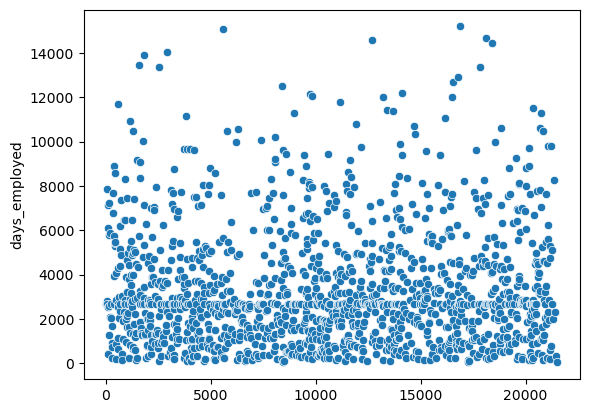

In [36]:
mean_data = data[data['income_type']=='госслужащий']
sns.scatterplot(data=mean_data, x=mean_data.index, y = mean_data['days_employed']);

Визуально на графике видно, что наиболее частое значение days_employed - в районе чуть выше 2тыс., но есть отдельные выбросы (значения, достигающие 14тыс.), которые и влияют на расчет среднего.

### Шаг 4: общий вывод.

В ходе анализа было проведено исследование надежности заемщиков.

<br><b>Исходные данные </b> представлены выборкой в 21,5тыс.строк со следующими данными о заемщиках и их кредитах:
- количество детей в семье
- общий трудовой стаж в днях
- возраст клиента в годах
- уровень образования клиента
- идентификатор уровня образования
- семейное положение
- идентификатор семейного положения
- пол клиента
- тип занятости
- имел ли задолженность по возврату кредитов
- ежемесячный доход
- цель получения кредита

<br><b>Анализ исходных данных выявил:</b>
-   в двух столбцах (общий трудовой стаж в днях и ежемесячный доход) примерно в 10% случаев есть пропуски в данных. Данные пропуски являются полностью случайными по отношению к другим данным в таблице. Однако, во всех случаях оба столбца имеют пропуски одновременно, что говорит о тесной взаимосвязи двух данных столбцов. Для корректировки всех последующих выборок необходимо более поставить задачу техническому отделу: изучить источники, из которых данные столбцы заполняются (если автоматически из сторонней системы - проверить ее работу, если пользователь заполняет их самостоятельно в форме на сайте - проверить, нет ли сбоев в работе формы).
- так как оба показателя количественные,а также в выборке есть информация о типе занятости заемщика, то пропуски могут быть заполнены медианным значением по каждому роду деятельности. Медианное значение в противовес среднему было выбрано в связи с тем, что медиана менее чувствительна к случайным выбросам в данных, а столбцы общий трудовой стаж в днях и ежемесячный доход как раз содержат подобные выбросы.
- также в ходе предобработки данных были исправлены, либо удалены аномальные значения: отрицательный трудовой стаж, а также отрицательное либо подозрительно большое количество детей (20) у заемщика. Отрицательный стаж был преобразован в положительный. Строки с некорректным количеством детей были исключены из выборки.
- типы и содержимое некоторых столбцов были приведены к наиболее удобным для исследования: ежемесячный доход преобразован в целое число, информация об уровне образования заемщика - стандартизирована (приведена к записи в нижнем регистре), что позволило исключить неявные дубликаты.
<br><b>Рекомендации к улучшению сбора данных: в первую очередь проверить технические проблемы, ведущие к пропускам и отрицательным значениям в столбцах с уровнем дохода и стажем, а также стоит добавить ограничение на поле с количеством детей, чтобы исключить ввод аномальных значений. При обработке информации об уровне образования  можно сделать приведение к нижнему регистру сразу на уровне загрузки данных.</b>


<br><b>Категоризация данных:</b>
<br>Для повышения удобства анализа, данные по некоторым столбцам были категоризированы, то есть обобщены в группы:
- по уровню ежемесячного дохода заемщики были распределены по группам: A,B,C,D,E
- по цели кредита, заявки были сгруппированы в категории: 'операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы', 'получение образования'.

<br><b>Исследовательский анализ выявил:</b>
<br><b>1.существует зависимость надежности заемщика от количества имеющихся детей:</b>
- для групп с 0-2 детьми есть прямая зависмость между кол-вом детей и риском задолженности.Вероятно, с ростом количества детей, растет и финансовая нагрузка на заемщика, в связи с чем и возможны долги. 
- на группы с 3 и более детьми стоит смотреть отдельно, т.к. группы небольшие и репрезентативность выборок под вопросом. Но если верить представленным данным, то в этих категориях зависимости между количеством детей и риском задолженности нет.

<br><b>2.существует зависимость надежности заемщика от семейного положения:</b>    
- замужние люди (либо побывавшие в официальном браке - вдовцы и в разводе), менее склонны к задолженности, чем те люди, которые "не женаты\не замужем", либо находятся в гражданском браке. 

<br><b>3.существует зависимость надежности заемщика от уровня дохода:</b> 
- пик процента должников приходится на уровни дохода до 30тыс.(категория Е). Очевидно, что минимальный уровень дохода ведет к высоким рискам задолженности по кредиту.
- 5люди с доходом от 30 до 50тыс. являются наиболее дисциплинированны в выплатах - они уже обеспечены необходимым им доходом, но все еще аккуратно относятся к расходам и ведению бюджета, поэтому у них минимальный процент должников по группе.
- далее с повышением дохода зависимость волнообразная - процент должников по категориям сначала снижается, затем повышается. Вероятно, при переходе на новый уровень дохода люди с одной стороны, имеют больше средств к выплатам (и поначалу снижают процент задолженности), но,с другой стороны, в какой-то момент люди начинают брать кредиты на бОльшие суммы (к сожалению, данных о сумме кредитов у нас нет, поэтому подтвердить гипотезу не можем), что ведет к новым задолженностям. Таким образом, происходит борьба двух факторов: повышение доходов и повышение потребительских аппетитов заемщиков.

<br><b>4.существует зависимость надежности заемщика от целей кредита:</b> 
- Заемщики, берущие кредит на операции с недвижимостью или проведение свадьбы менее склонны к просрочке, чем - заемщики, берущие кредит на оперции с автомобилем и получение образования.
- процент должников в категориях "операции с недвижимостью" и "получение образования" практически идентичен
- наименьший процент должников в категории "операции с недвижимостью"
    
<b>Таким образом, в целом можно сформулировать портрет добросовестного заемщика: это женатые и замужние без детей с уровнем дохода в категориях B и D, которые берут кредит на операции с недвижимостью.
<br> При этом, наиболее рискованная группа заемщиков для банка - это незамужние с 2детьми и доходом в категориях E,C,A, берущие кредит на операции с автомобилем или получение образования. </b>